# Python-executable version of PathView Graph for ARC single BCR model

Runs ARC-class fuel cycle residence time model based on Meschini's work.
Expect simulation to take around 5 minutes to run.

In [3]:

from pathview_python_code import arc_same_as_meschini

# Execute the function to run the model and save results
arc_same_as_meschini(300 * 24 * 3600) # 300 days in seconds

19:57:16 - INFO - LOGGING (log: True)
19:57:16 - INFO - BLOCKS (total: 25, dynamic: 11, static: 14, eventful: 1)
19:57:16 - INFO - GRAPH (nodes: 25, edges: 40, alg. depth: 3, loop depth: 0, runtime: 0.473ms)
19:57:16 - INFO - STARTING -> TRANSIENT (Duration: 25920000.00s)
19:57:20 - INFO - --------------------   1% | 4.1s<08:24 | 754.8 it/s
19:57:24 - INFO - --------------------   2% | 8.4s<08:41 | 725.9 it/s
19:57:28 - INFO - --------------------   3% | 12.2s<07:17 | 831.4 it/s
19:57:32 - INFO - --------------------   4% | 16.0s<07:00 | 844.7 it/s
19:57:36 - INFO - #-------------------   5% | 19.9s<07:01 | 846.4 it/s
19:57:39 - INFO - #-------------------   6% | 23.5s<06:40 | 880.1 it/s
19:57:43 - INFO - #-------------------   7% | 27.0s<06:40 | 840.4 it/s
19:57:46 - INFO - #-------------------   8% | 30.5s<06:41 | 863.4 it/s
19:57:50 - INFO - #-------------------   9% | 34.0s<06:38 | 857.1 it/s
19:57:53 - INFO - ##------------------  10% | 37.6s<06:44 | 824.4 it/s
19:57:57 - INFO - #

Plot saved to: ../plots/ARC_same_as_meschini_inventory_vs_time.png


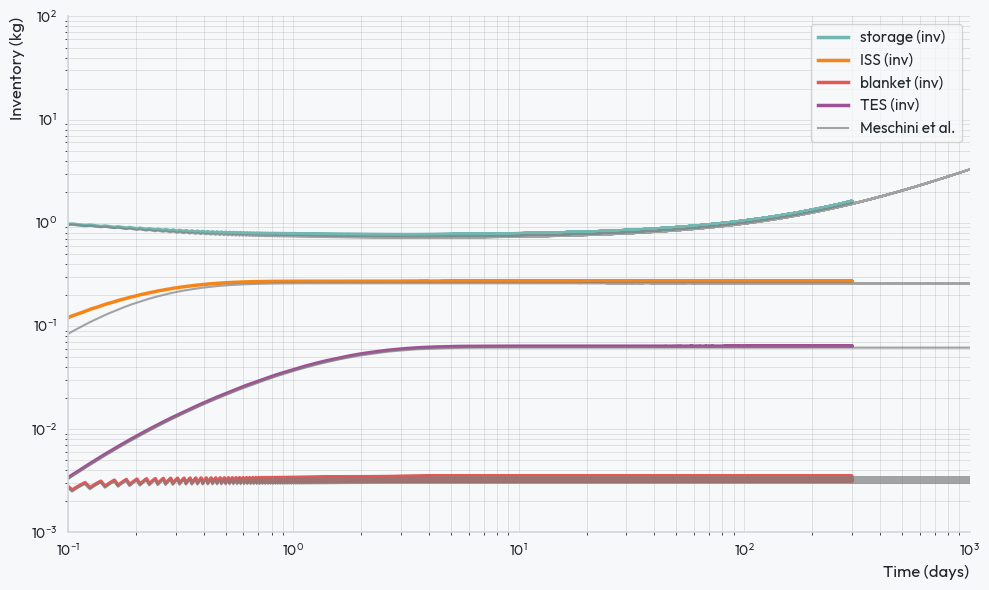

In [ ]:
### Plot Results: Inventory vs Time ###

import numpy as np
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import morethemes as mt

# Load results and metadata
results_path = '/results/ARC_same_as_meschini_results.npz'
metadata_path = '/results/ARC_same_as_meschini_metadata.json'

loaded_data = np.load(results_path)
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# print(list(loaded_data.keys()))

# read data from a url for comparison
url = "https://raw.githubusercontent.com/SamueleMeschini/fuel-cycle/refs/heads/main/postprocessing/data/inventory_evolution_tbz1h.csv"
data_meschini = pd.read_csv(url)
time_meschini_days = data_meschini["time [s]"] / (24 * 3600)

# Extract time (same for all scopes)
time = loaded_data['scope_2_Storage_Pump_ISS_Cleanup_time']
time_days = time / (24 * 3600)

# Extract inner fuel cycle data (scope 3)
inner_fc_data = loaded_data['scope_2_Storage_Pump_ISS_Cleanup_data']

# Extract outer fuel cycle data (scope 1)
outer_fc_data = loaded_data['scope_0_Divertor_FW_Blanket_TES_HX_data']

# Create figure
mt.set_theme("lighter")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each inventory component
# Storage (index 0 from scope 0)
ax.loglog(time_days, inner_fc_data[0], linewidth=2.5, label='storage (inv)')

# ISS (index 2 from scope 0)
ax.loglog(time_days, inner_fc_data[2], linewidth=2.5, label='ISS (inv)')

# Blanket (index 2 from scope 1)
ax.loglog(time_days, outer_fc_data[2], linewidth=2.5, label='blanket (inv)')

# TES (index 3 from scope 1)
ax.loglog(time_days, outer_fc_data[3], linewidth=2.5, label='TES (inv)')

# Plot Meschini's data for comparison
ax.loglog(time_meschini_days, data_meschini["storage inventory [kg]"], color="tab:grey", alpha=0.7, label="Meschini et al.")
ax.loglog(time_meschini_days, data_meschini["ISS inventory [kg]"], color="tab:grey", alpha=0.7)
ax.loglog(time_meschini_days, data_meschini["blanket inventory [kg]"], color="tab:grey", alpha=0.7)
ax.loglog(time_meschini_days, data_meschini["TES inventory [kg]"], color="tab:grey", alpha=0.7)

# Styling
ax.set_xlabel('Time (days)', fontsize=12)
ax.set_ylabel('Inventory (kg)', fontsize=12)
ax.set_xlim([0.1, 1e3])
ax.set_ylim([1e-3, 1e2])
ax.grid(True, which='both', alpha=0.3)
ax.legend(loc='best', fontsize=11)

plt.tight_layout()

# Save plot to plots folder
plots_dir = '../plots'
os.makedirs(plots_dir, exist_ok=True)
plot_filename = 'ARC_same_as_meschini_inventory_vs_time_Fig1.png'
plot_path = os.path.join(plots_dir, plot_filename)
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {plot_path}")

plt.show()